**Integrantes del equipo:**
* Angel Alberto Arista Villanueva
* Carlos Cabrera Castrejón
* Juan Pablo De Hoyos Gúzman
* Ricardo Ariel Flores Peregrina
* Michelle Márquez
* David Meza Herz

# Proyecto Final: *Prediccion de salario anual basado en el censo Estadounidense*

**Descripción del proyecto**

En las dos últimas décadas, el ser humano ha aumentado mucho su 
dependencia de los datos y la información en la sociedad y con este 
crecimiento, las tecnologías han evolucionado para su almacenamiento 
análisis y procesamiento a gran escala. Los campos de la minería de datos 
de datos y el aprendizaje automático no sólo los han explotado 
para el conocimiento y el descubrimiento, sino también para explorar ciertos 
patrones y conceptos ocultos que conducen a la predicción de futuros 
eventos futuros, no fáciles de obtener. El problema de la desigualdad de ingresos 
ha sido motivo de gran preocupación en los últimos años. Hacer que los 
pobres estén mejor no parece ser el único criterio a tener en 
búsqueda de la erradicación de este problema. Los habitantes de Estados Unidos 
creen que la llegada de la desigualdad económica es inaceptable 
y exige un reparto justo de la riqueza en la sociedad. Este modelo 
tiene como objetivo realizar un análisis exhaustivo para destacar 
los factores clave que son necesarios para mejorar los ingresos de un individuo. 
de un individuo. Este análisis ayuda a centrarse en las áreas importantes 
que pueden mejorar significativamente los niveles de ingresos de 
de los individuos.
Este documento se ha estructurado en forma de introducción, revisión de la 
metodología propuesta, la formación del modelo, los detalles de la aplicación, los resultados y la conclusión.


**Objetivos del proyecto**

* Tratar de predecir el sueldo anual de algun individuo basado en un set de datos de personas Estadounidenses
* Demostrar la eficiencia del modelo de Regresion Logistica

Evaluation Metric
Accuracy, Confusion Matrix


**Descripción del conjunto de datos**

El conjunto de datos de los ingresos del censo tiene 48.842 entradas. Cada entrada contiene la siguiente información
sobre un individuo:

- Age: Edad del individuo
- Workclass: Sector de trabajo del individuo
- Fnlwgt: Número de personas estimadas en el censo
- Education: Nivel de educación más alto que alcanzó el individuo
- Education-num: Nivel de educación de manera numerica
- Marital-status: Estado civil del individuo
- Occupation: Tipo de trabajo
- Relationship:
- Race: Estado del individuo con otros
- Sex: Sexo del individuo
- Capital-gain: Ganancia de capital del individuo
- Capital-loss: Pérdida de capital del individuo
- Hours-per-week: Horas que trabaja el individuo a la semana
- Native-country: País de origen
- Class: Etiqueta de que si el individuo gana mas o menos de $50,000 USD anuales

In [1]:
# Importacion de las librerias que usaremos en el proyecto

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Pre-procesamiento
from sklearn.model_selection import train_test_split # Dividir datos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay # Métricas de evaluación
from sklearn.metrics import confusion_matrix


---

**Pre-procesamiento**

In [2]:
# Direccion de la que obtuvimos el dataset
df = pd.read_csv('https://raw.githubusercontent.com/Fusion-Rick/usa_income_dataset/main/adults_income_dataset.csv')

In [3]:
# Primeros contenidos del dataset
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
# Como podemos observar, tenemos 48,842 registros de personas en el dataset
df.shape

(48842, 15)

In [5]:
# Checamos si existen valores nulos en nuestro dataset que podrian afectar nuestro modelo
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Class             0
dtype: int64

Graficas para la exploracion de los datos

- Edades en el dataset

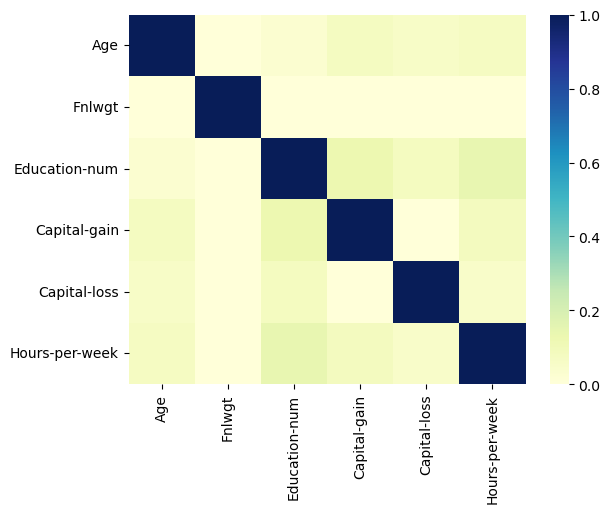

In [6]:
sns.heatmap(df.corr(), vmin=0, vmax=1, cmap='YlGnBu')
plt.show()

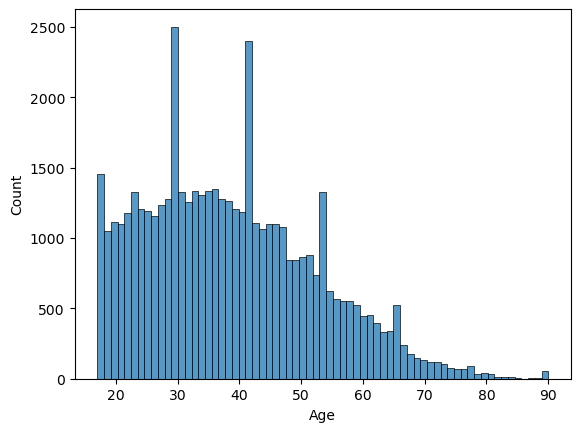

In [7]:
sns.histplot(x='Age', data=df)
plt.show()

- Sectores de trabajo

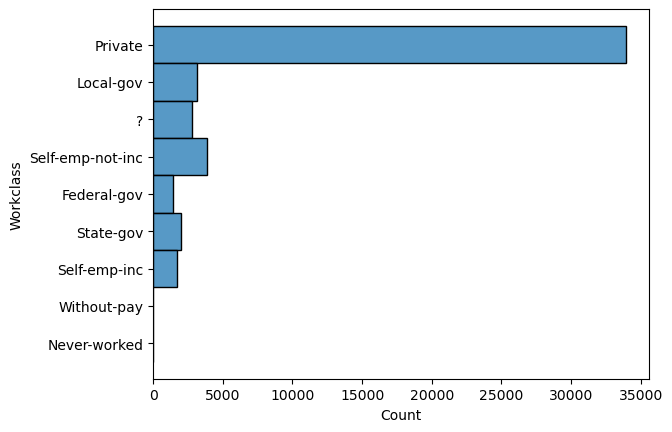

In [8]:
sns.histplot(y='Workclass', data=df)
plt.show()

- Grados de escolaridad

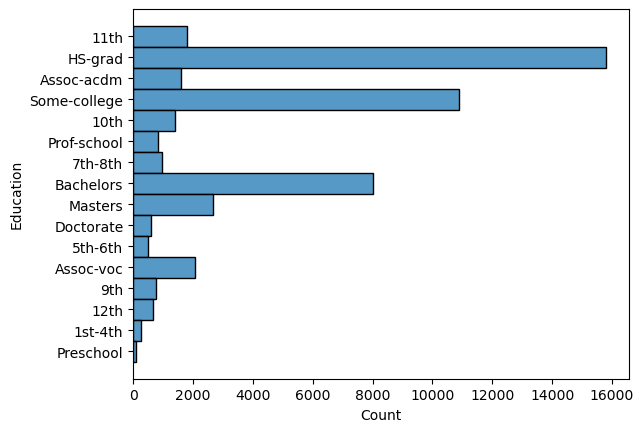

In [9]:
sns.histplot(y='Education', data=df)
plt.show()

- Estado civil

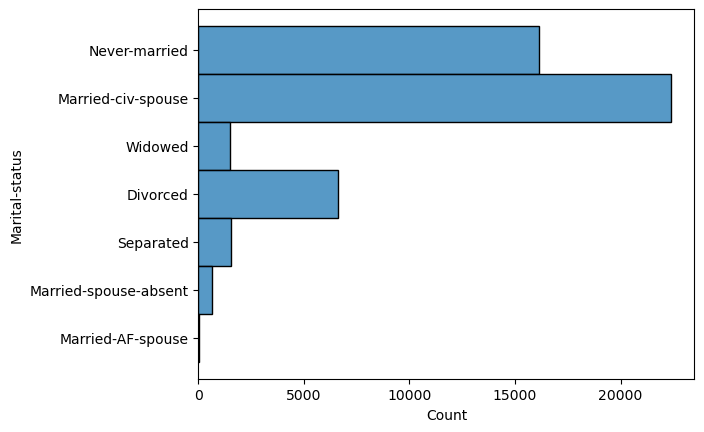

In [10]:
sns.histplot(y='Marital-status', data=df)
plt.show()

- Tipos de trabajos

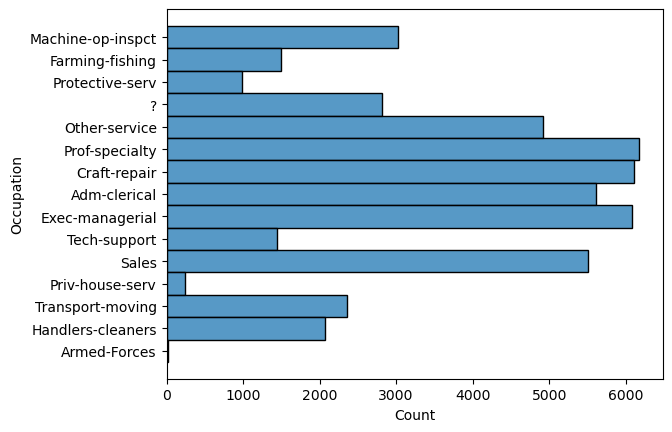

In [11]:
sns.histplot(y='Occupation', data=df)
plt.show()

- Relacion familiar

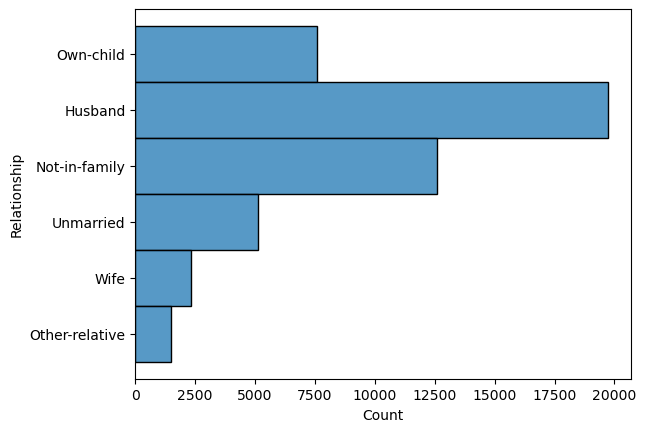

In [12]:
sns.histplot(y='Relationship', data=df)
plt.show()

- Raza

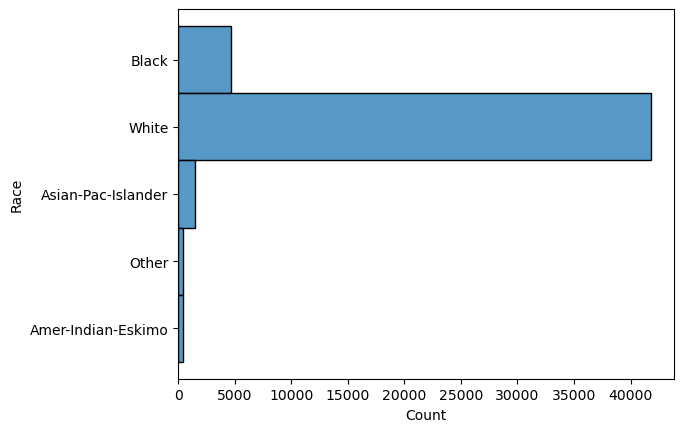

In [13]:
sns.histplot(y='Race', data=df)
plt.show()

- Sexo

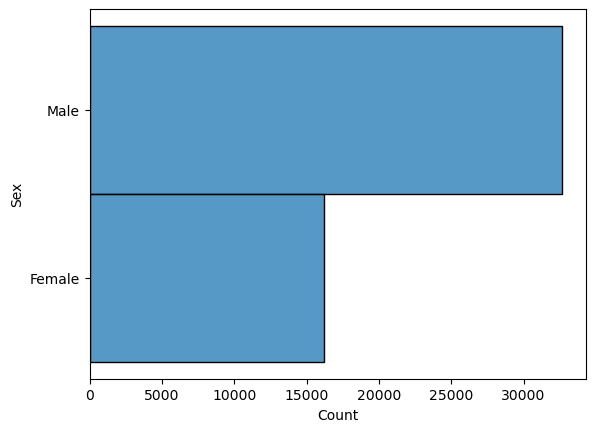

In [14]:
sns.histplot(y='Sex', data=df)
plt.show()

- Horas que trabajan a la semana

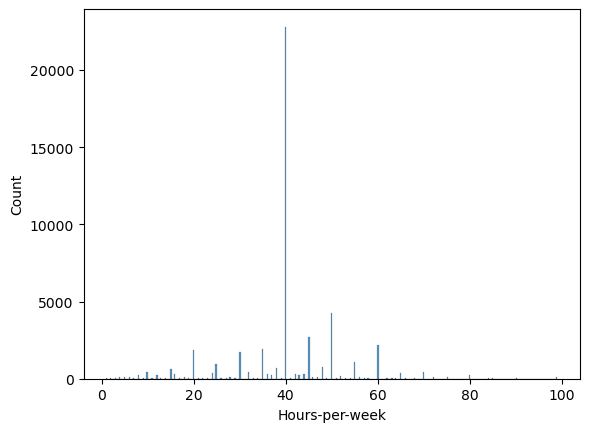

In [15]:
sns.histplot(x='Hours-per-week', data=df, )
plt.show()

- Paises de origen

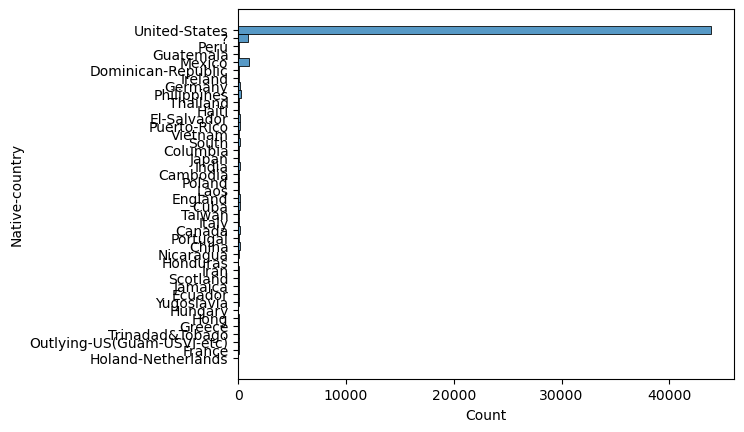

In [16]:
sns.histplot(y='Native-country', data=df)
plt.show()

- Conteo de los que ganan mas de y menos de $50k USD 

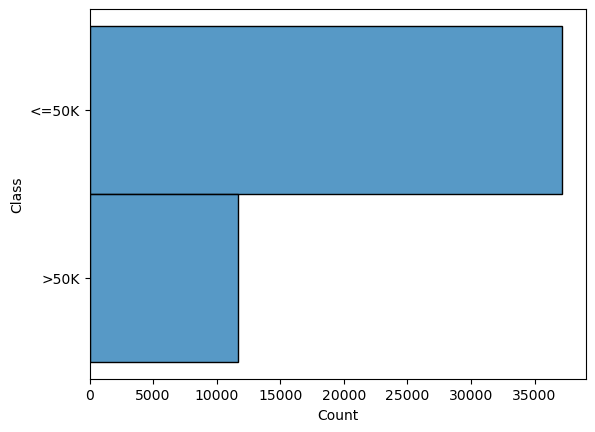

In [17]:
sns.histplot(y='Class', data=df)
plt.show()

En esta siguiente seccion hicimos un pequeño analisis para ver los tipos de datos que teniamos

In [18]:
# ages = pd.unique(df['Ages'])
workclass = pd.unique(df['Workclass'])
fnlwgt = pd.unique(df['Fnlwgt'])
education = pd.unique(df['Education'])
education_num = pd.unique(df['Education-num'])
marital_status = pd.unique(df['Marital-status'])
occupation = pd.unique(df['Occupation'])
relationship = pd.unique(df['Relationship'])
race = pd.unique(df['Race'])
sex = pd.unique(df['Sex'])
capital_gain = pd.unique(df['Capital-gain'])
capital_loss = pd.unique(df['Capital-loss'])
hours_per_week = pd.unique(df['Hours-per-week'])
native_country = pd.unique(df['Native-country'])
class_df = pd.unique(df['Class'])

In [19]:
print("Total de clases de trabajo: ", workclass)

Total de clases de trabajo:  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [20]:
print("Clases de trabajo: ", fnlwgt)

Clases de trabajo:  [226802  89814 336951 ... 129912 255835 257302]


In [21]:
print("Grados de educacion: ", education)

Grados de educacion:  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


In [22]:
print("Total de ?: ", education_num)

Total de ?:  [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


In [23]:
print("Estados civiles: ", marital_status)

Estados civiles:  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [24]:
print("Tipos de trabajo: ", occupation)

Tipos de trabajo:  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


In [25]:
print("Tipos de relaciones: ", relationship)

Tipos de relaciones:  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


In [26]:
print("Razas: ", race)

Razas:  ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [27]:
print("Sexos: ", sex)

Sexos:  ['Male' 'Female']


In [28]:
print("Capital gain: ", capital_gain)

Capital gain:  [    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  6514 41310  3456  7430  2414  2062 34095  1831  6723  5060
 15831  2977  2346  3273  2329  9562  2635  4931  1731  6097   914  7896
  5556  1409  3781  3942  2538  3887 25124  7443  5721  1173  4687  6612
  6767  2961   991  2036  2936  2050  1111  2228 22040  3432  6360  2009
  1639 18481  2387]


In [29]:
print("Capital loss: ", capital_loss)

Capital loss:  [   0 1721 1876 2415 1887  625 1977 2057 1429 1590 1485 2051 2377 1672
 1628 1902 1602 1741 2444 1408 2001 2042 1740 1825 1848 1719 3004 2179
 1573 2205 1258 2339 1726 2258 1340 1504 2559 1668 1974 1980 1564 2547
 2002 1669 1617  323 3175 2472 2174 1579 2129 1510 1735 2282 1870 1411
 1911 1651 1092 1762 2457 2231 2238  653 1138 2246 2603 2392 1944 1380
 2465 1421 3770 1594  213 2149 2824 1844 2467 2163 1816 1648 2206 2352
  419 1539  880  810  974 4356 2489 1755 3683 2267 2080  155 3900 2201
 2754]


In [30]:
print("Horas de trabajo: ", hours_per_week)

Horas de trabajo:  [40 50 30 32 10 39 35 48 25 20 45 47  6 43 90 54 60 38 36 18 24 44 56 28
 16 41 22 55 14 33 37  8 12 70 15 75 52 84 42 80 68 99 65  5 17 72 53 29
 96 21 46  3  1 23 49 67 76  7  2 58 26 34  4 51 78 63 31 92 77 27 85 13
 19 98 62 66 57 11 86 59  9 64 73 61 88 79 89 74 69 87 97 94 82 91 81 95]


In [31]:
print("Paises: ", native_country)

Paises:  ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


In [32]:
print("Class: ", class_df)

Class:  ['<=50K' '>50K']


Un factor importante que notamos en el dataset es que habian varios registros en las columnas de 'Workclass', 'Occupation' y 'Native-country'

Por lo tanto hicimos un conteo de cuantos registros tenian valores incompletos y decidimos eliminar dichos registros del dataset

In [33]:
(df=='?').sum()

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     857
Class                0
dtype: int64

Despues de esto, se eliminaron aproximadamente 4,000 registros que pensamos que podria afectar nuestro modelo y nos parecio apropiado borrarlos para que no causara conflicto

In [34]:
df_filter_workclass = df[df['Workclass'] == '?']
df_filter_occupation = df[df['Occupation'] == '?']
df_filter_country = df[df['Native-country'] == '?']

dfFiltered = pd.concat([df_filter_workclass, df_filter_occupation, df_filter_country], join="inner")

dfFilteredIndex = dfFiltered.index

df.drop(dfFilteredIndex, inplace=True)

df.shape


(45222, 15)

Y de esta manera fue como obtuvimos un dataset mucho mas limpio y apto para empezar a trabajarlo en nuestro modelo

In [35]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


Otro factor importante fue que decidimos eliminar las columnas de 'Fnlwgt', 'Capital-gain' y 'Capital-loss', ya que los datos nos parecieron que no serian utiles mas adelante

In [36]:
df = df.drop(['Fnlwgt', 'Capital-gain', 'Capital-loss'], axis=1)

Volvimos a verificar que efectivamente no tuvieramos valores desconocidos en nuestro dataset

In [37]:
(df=='?').sum()

Age               0
Workclass         0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
Class             0
dtype: int64

De los ultimos pasos para la limpieza de los datos, decidimos volver la columna 'Class' en valores numericos y asi poder utilizarlos en el modelo

In [38]:
df.Class[df.Class == '<=50K'] = 0
df.Class[df.Class == '>50K'] = 1
df['Class'] = df["Class"].astype(np.int64)


C:\Users\ricar\AppData\Local\Temp\ipykernel_804\3316581482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class[df.Class == '<=50K'] = 0
C:\Users\ricar\AppData\Local\Temp\ipykernel_804\3316581482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class[df.Class == '>50K'] = 1


In [39]:
df.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0


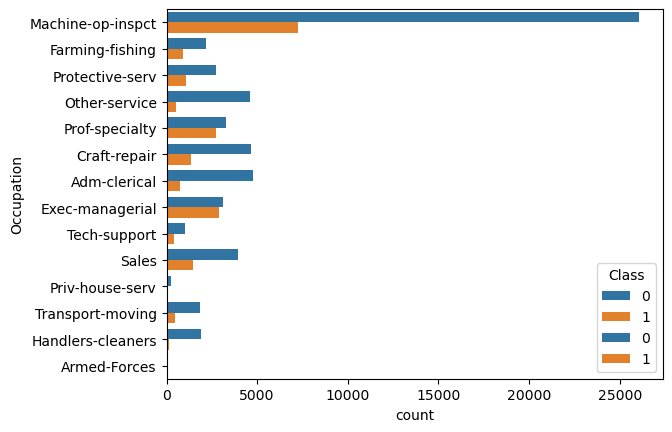

In [40]:
grafica1=sns.countplot(y='Workclass', hue='Class', data = df)
grafica2=sns.countplot(y='Occupation', hue='Class', data = df)

Aqui adelante fue cuando empezamos a agrupar nuestras columnas categoricas en base al tipo de objeto

In [41]:
df.dtypes

Age                int64
Workclass         object
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours-per-week     int64
Native-country    object
Class              int64
dtype: object

In [42]:
categorical_features = df.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, df[col].nunique())

Workclass 7
Education 16
Marital-status 7
Occupation 14
Relationship 6
Race 5
Sex 2
Native-country 41


In [43]:
for col in categorical_features:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col, prefix_sep=':')], axis=1)
    df.drop(col, axis=1, inplace=True)

In [44]:
df.head()

,Age,Education-num,Hours-per-week,Class,Workclass:Federal-gov,Workclass:Local-gov,Workclass:Private,Workclass:Self-emp-inc,Workclass:Self-emp-not-inc,Workclass:State-gov,...,Native-country:Portugal,Native-country:Puerto-Rico,Native-country:Scotland,Native-country:South,Native-country:Taiwan,Native-country:Thailand,Native-country:Trinadad&Tobago,Native-country:United-States,Native-country:Vietnam,Native-country:Yugoslavia
0,25,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,30,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


---

**Regresion lineal**

In [45]:
# Separamos predictores (X) de la clase (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creamos modelo y entrenamos
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data




c:\Users\ricar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
45309,0,0
41865,0,0
23263,0,0
28507,0,0
7491,0,0
...,...,...
16107,1,0
9194,0,1
26055,1,0
992,1,1


In [46]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10149
           1       0.70      0.56      0.62      3418

    accuracy                           0.83     13567
   macro avg       0.78      0.74      0.76     13567
weighted avg       0.82      0.83      0.82     13567



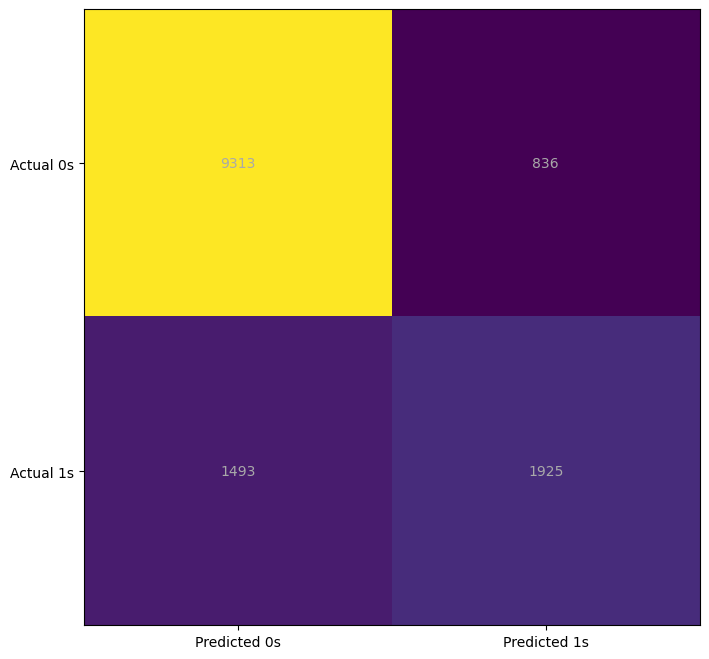

In [48]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='darkgrey')
plt.show()



---

**Conclusiones**

Después de limpiar, analizar y trazar los datos, he aquí algunas ideas que he encontrado:

Sólo un tercio de la población de la época se consideraba de ingresos altos, mientras que dos tercios de la población ganaba menos de 50.000 dólares al año.
El mayor porcentaje de asiáticos ganaba más de 50.000 dólares y la clase blanca le seguía de cerca.
La ganancia de capital fue un buen indicador de la riqueza, con una separación bastante clara de las personas que ganan más de 50.000 con una mayor ganancia de capital, lo que es un indicador de que la brecha de riqueza en los EE.UU. está empezando a crecer.
Las pérdidas de capital fueron una mezcla de individuos con altos y bajos ingresos y no un claro indicador de riqueza
La educación fue un indicador bastante bueno de los ingresos, con el mayor porcentaje de individuos con ingresos altos que terminaron un doctorado, un máster o una licenciatura. La mayoría de la población tenía o bien un título de bachillerato y/o algunos estudios universitarios terminados.
Los casados tienen el mayor porcentaje de personas con ingresos elevados y los maridos constituyen la mayor parte de la mano de obra.
El mercado de trabajo masculino duplicaba con creces el mercado de trabajo femenino en 1994
El trabajo dominante para los hombres era el de artesano-reparador, mientras que el trabajo dominante para las mujeres era el de administrativo.
Nuestras matrices de correlación muestran muchas correlaciones y correlaciones entre campos. Hemos tenido que eliminar algunos campos para evitar la correlación.